In [ ]:
import json
import pandas as pd

from scripts.allPrompts import load_prompts



df = load_prompts("../assets/conversations.json")

print(f"Total prompts collected: {len(df)}")

ModuleNotFoundError: No module named 'scripts'

In [1]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Make sure NLTK stopwords are downloaded
import nltk
nltk.download('stopwords')

# Combine all prompt text into a single string
all_text = " ".join(df['text'].dropna().astype(str))

# Clean text: lowercase, remove punctuation
clean_text = re.sub(r'[^\w\s]', '', all_text.lower())

# Split into words
words = clean_text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count word frequency
word_counts = Counter(filtered_words)

# Show the 20 most common words
most_common = word_counts.most_common(20)
print(most_common)

# Optional: Plot a bar chart
words, counts = zip(*most_common)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: name 'df' is not defined

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 meaningful words: [('like', 12944), ('const', 11593), ('know', 11241), ('type', 9320), ('react', 8680), ('runtime', 8086), ('people', 7685), ('think', 7645), ('also', 7238), ('actually', 6460), ('name', 6002), ('return', 5988), ('would', 5938), ('kind', 5679), ('effect', 5638), ('use', 5562), ('get', 5457), ('context', 5319), ('string', 4728), ('id', 4606)]


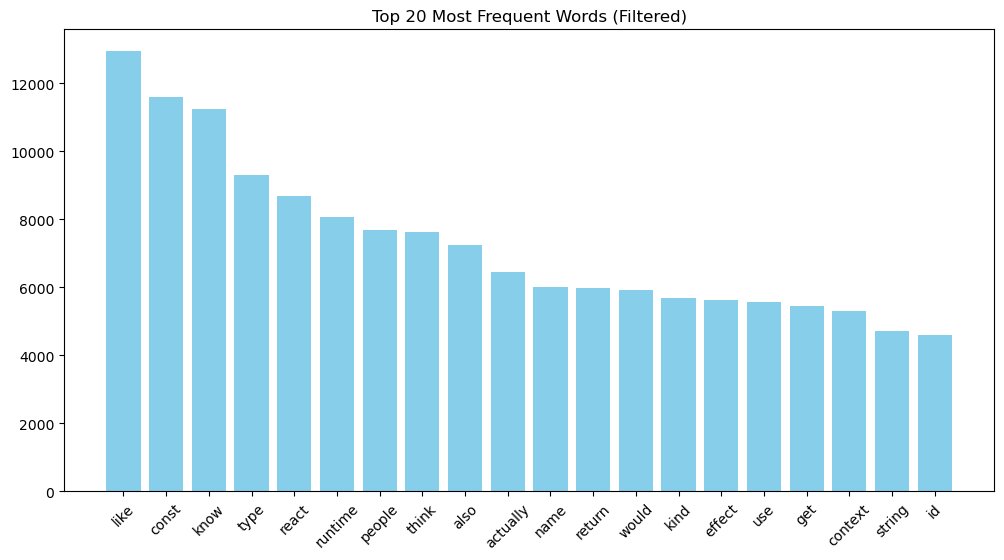

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords if you haven't yet
nltk.download('stopwords')

# Combine all prompts into one text
all_text = " ".join(df['text'].dropna().astype(str))

# Lowercase and remove punctuation/numbers
cleaned_text = re.sub(r'[^a-zA-Z\s]', ' ', all_text.lower())

# Tokenize
words = cleaned_text.split()

# Remove English and Dutch stopwords
stop_words = set(stopwords.words('english')) | set(stopwords.words('dutch'))
filtered_words = [w for w in words if w not in stop_words and len(w) > 1]

# Count frequency
word_counts = Counter(filtered_words)
most_common = word_counts.most_common(20)

print("Top 20 meaningful words:", most_common)

# Plot
words_plot, counts_plot = zip(*most_common)
plt.figure(figsize=(12, 6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words (Filtered)")
plt.show()